## Linear regression example by using "mpg" dataset

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [16]:
import seaborn as sns
df=sns.load_dataset("mpg")

In [17]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [18]:
df.shape

(398, 9)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [20]:
df.name.nunique()

305

In [21]:
df.drop(["name"], axis=1, inplace = True)

In [22]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [23]:
df.dropna(inplace = True)

In [24]:
df.isnull().sum().any()

False

In [26]:
df.shape

(392, 8)

In [27]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [29]:
from datetime import datetime

In [30]:
today = datetime.today()

In [31]:
this_year = today.year
this_year

2020

In [33]:
df["age"] = this_year - (1900 +df.model_year)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,age
0,18.0,8,307.0,130.0,3504,12.0,70,usa,50
1,15.0,8,350.0,165.0,3693,11.5,70,usa,50
2,18.0,8,318.0,150.0,3436,11.0,70,usa,50
3,16.0,8,304.0,150.0,3433,12.0,70,usa,50
4,17.0,8,302.0,140.0,3449,10.5,70,usa,50


In [34]:
df.drop(["model_year"], axis=1, inplace = True)

In [35]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,age
0,18.0,8,307.0,130.0,3504,12.0,usa,50
1,15.0,8,350.0,165.0,3693,11.5,usa,50
2,18.0,8,318.0,150.0,3436,11.0,usa,50
3,16.0,8,304.0,150.0,3433,12.0,usa,50
4,17.0,8,302.0,140.0,3449,10.5,usa,50


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   origin        392 non-null    object 
 7   age           392 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


In [37]:
df2 = df.copy()

In [38]:
df=pd.get_dummies(df, drop_first = True)

In [39]:
df2 = pd.get_dummies(df)  #Try the model with df2 to see the difference

In [40]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa
386,25.0,6,181.0,110.0,2945,16.4,38,0,1
382,34.0,4,108.0,70.0,2245,16.9,38,1,0
342,30.0,4,135.0,84.0,2385,12.9,39,0,1
303,31.8,4,85.0,65.0,2020,19.2,41,1,0
191,22.0,6,225.0,100.0,3233,15.4,44,0,1
113,21.0,6,155.0,107.0,2472,14.0,47,0,1
200,18.0,6,250.0,78.0,3574,21.0,44,0,1
61,21.0,4,122.0,86.0,2226,16.5,48,0,1
122,24.0,4,121.0,110.0,2660,14.0,47,0,0
393,27.0,4,140.0,86.0,2790,15.6,38,0,1


In [41]:
X = df.drop(["mpg"], axis =1)
y = df["mpg"]

In [42]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa
0,8,307.0,130.0,3504,12.0,50,0,1
1,8,350.0,165.0,3693,11.5,50,0,1
2,8,318.0,150.0,3436,11.0,50,0,1
3,8,304.0,150.0,3433,12.0,50,0,1
4,8,302.0,140.0,3449,10.5,50,0,1


In [43]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [46]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
lm.intercept_

79.20294463155581

In [48]:
coeff_parameter = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_parameter

,Coefficient
cylinders,-0.342101
displacement,0.019206
horsepower,-0.021620
weight,-0.006423
acceleration,0.042198
age,-0.797161
origin_japan,0.330470
origin_usa,-2.875499


In [49]:
y_pred=lm.predict(X_test)

In [50]:
y_pred_train=lm.predict(X_train)

In [52]:
eval_metrics(y_test, y_pred)

r2_score: 0.7922774714022587 
 mae: 2.4619996980661436 
 mse: 10.602279011688337 
 rmse: 3.2561140968473965


In [53]:
eval_metrics(y_train, y_pred_train)

r2_score: 0.8286865575852228 
 mae: 2.5445826417298 
 mse: 10.809834360243094 
 rmse: 3.287831254830925


In [54]:
my_dict={"Actual":y_test, "Pred":y_pred}
compare=pd.DataFrame(my_dict)

In [55]:
compare.sample(10)

,Actual,Pred
95,12.0,8.663687
47,19.0,17.407131
276,21.6,26.902469
152,19.0,20.381536
385,38.0,36.042424
30,28.0,22.754263
307,26.8,25.630638
241,22.0,26.441800
9,15.0,12.746398
277,16.2,22.690025


In [ ]:
#pip install yellowbrick

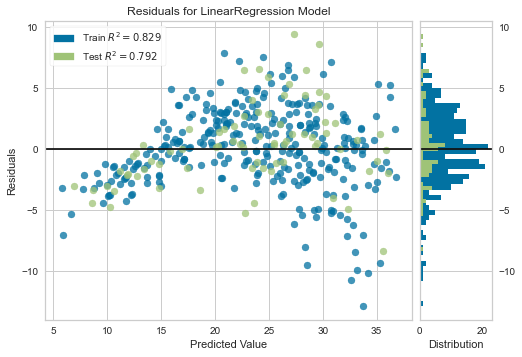

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [56]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = lm
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

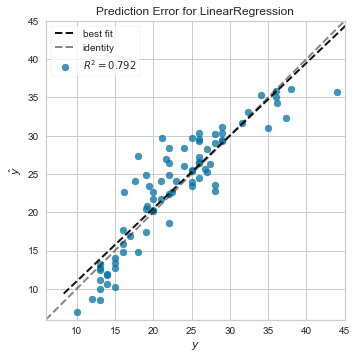

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [57]:
from yellowbrick.regressor import PredictionError


# Instantiate the linear model and visualizer
model = lm
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure